 
 
<h1 style='background-color: #6495ED; font-family:newtimeroman; font-size:300%; text-align:center; border-radius: 15px 50px;' > STROKE PREDICTION USING ML </h1>

## IMPORTING LIBRARIES

In [1]:
import pandas as pd  #IMPORTING PANDAS
import numpy as np   #IMPORTING NUMPY
import matplotlib.pyplot as plt#IMPORTING MATHPLOT LIB FOR DATAVISULIZATION
%matplotlib inline
import seaborn as sns              #IMPORTING SEABORN FOR DATAVISULIZATION


import warnings                  
warnings.simplefilter("ignore")  #for ignoring warnings

In [2]:
!pip install imblearn

## Loading up the data

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv") 

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
1,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
3,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
4,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0


In [4]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
1,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
3,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
4,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
5,121,Female,38.0,0,0,Yes,Private,Urban,91.44,NaN,Unknown,0
6,129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0
7,132,Female,80.0,0,0,Yes,Govt_job,Urban,84.86,NaN,Unknown,0
8,156,Female,33.0,0,0,Yes,Private,Rural,86.97,42.2,never smoked,0
9,163,Female,20.0,0,0,No,Private,Rural,94.67,28.8,Unknown,0


In [5]:
df.columns   # NO OF COLUMNS 

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## DROPPING UNWANTED COLUMNS

In [7]:
df.drop("id", axis=1, inplace=True)  # Dropping column 'id' as it can cause unwanted correlation. it is unique identifier

In [8]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
1,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
3,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
4,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0


In [9]:
df.shape   #for number of columns and rows 

(5110, 11)

In [10]:
print("THE NUMBER OF ROWS/RECORDS : 5110")

print("THE NUMBER OF COLUMNS/ATTRIBUTES : 12")

THE NUMBER OF ROWS/RECORDS : 5110
THE NUMBER OF COLUMNS/ATTRIBUTES : 11


In [11]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [12]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [13]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## VARIABLE DESCRIPTION

* id: unique identifier  (already Dropped ) 
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not

## CHECKING FOR NULL VALUES  (data preprocessing)

In [14]:
df.isna()   #give true if there is null value viceversa

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,False,False
5106,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isna().sum()   #gives count of null values in each column

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:
#PRINTING ALL THE NULL VALUES
print("total no of null values in healthcare-dataset-stroke-data-------->",df.isnull().sum().sum())

total no of null values in healthcare-dataset-stroke-data--------> 201


## FILLING THE NULL VALUES

In [17]:
#from sklearn.impute import SimpleImputer

In [18]:
from sklearn.impute import KNNImputer

In [19]:
imputer = KNNImputer(n_neighbors = 5)                          # imputing  the null values in BMI
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [20]:
df.isna().sum()     #checking for null values again

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [21]:
#PRINTING ALL THE NULL VALUES
print("total no of null values in healthcare-dataset-stroke-data-------->",df.isnull().sum().sum())   

total no of null values in healthcare-dataset-stroke-data--------> 0


## Exploratory Data Analysis

### CHECKING NO OF STROKE OCCURANCE IN DATASET

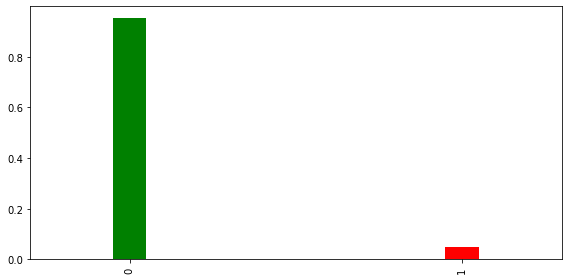

In [22]:
fig, axes = plt.subplots(figsize=(8, 4))
df['stroke'].value_counts(normalize=True).plot.bar(width=0.1, color=('green','red'))

plt.tight_layout()
plt.show()

### CATEGORICAL COLUMNS

In [23]:
df.gender.value_counts()    

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

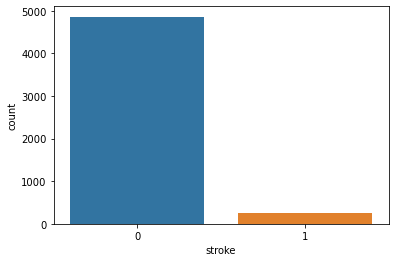

In [24]:
sns.countplot(df['stroke'])   # graph for gender

<AxesSubplot:xlabel='gender', ylabel='count'>

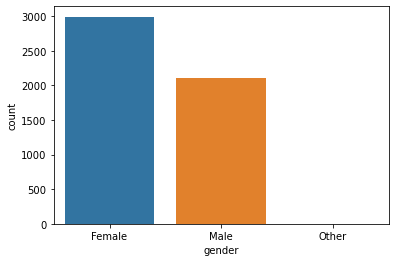

In [25]:
sns.countplot(df['gender'])   # graph for gender

<AxesSubplot:xlabel='ever_married', ylabel='count'>

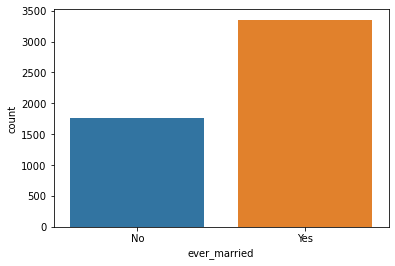

In [26]:
sns.countplot(df['ever_married'])

<AxesSubplot:xlabel='work_type', ylabel='count'>

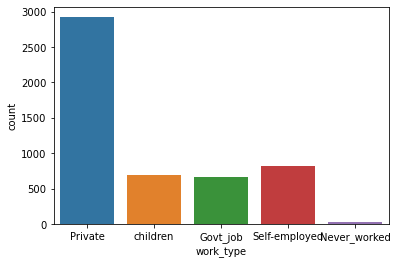

In [27]:
sns.countplot(df['work_type'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

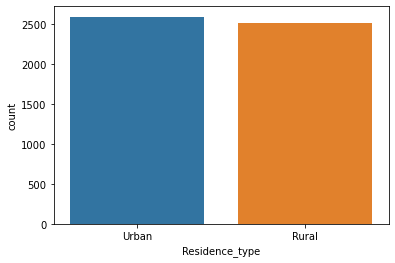

In [28]:
sns.countplot(df['Residence_type'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

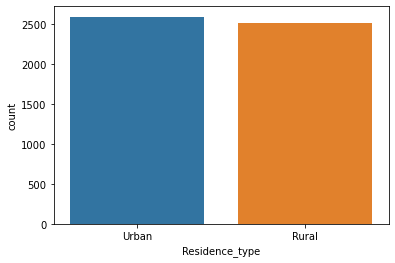

In [29]:
sns.countplot(df['Residence_type'])

In [30]:
cols = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
cols.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,17.0,0,0,92.97,28.893237
1,13.0,0,0,85.81,18.600000
2,55.0,0,0,89.17,31.500000
3,42.0,0,0,98.53,18.500000
4,31.0,0,0,108.89,52.300000


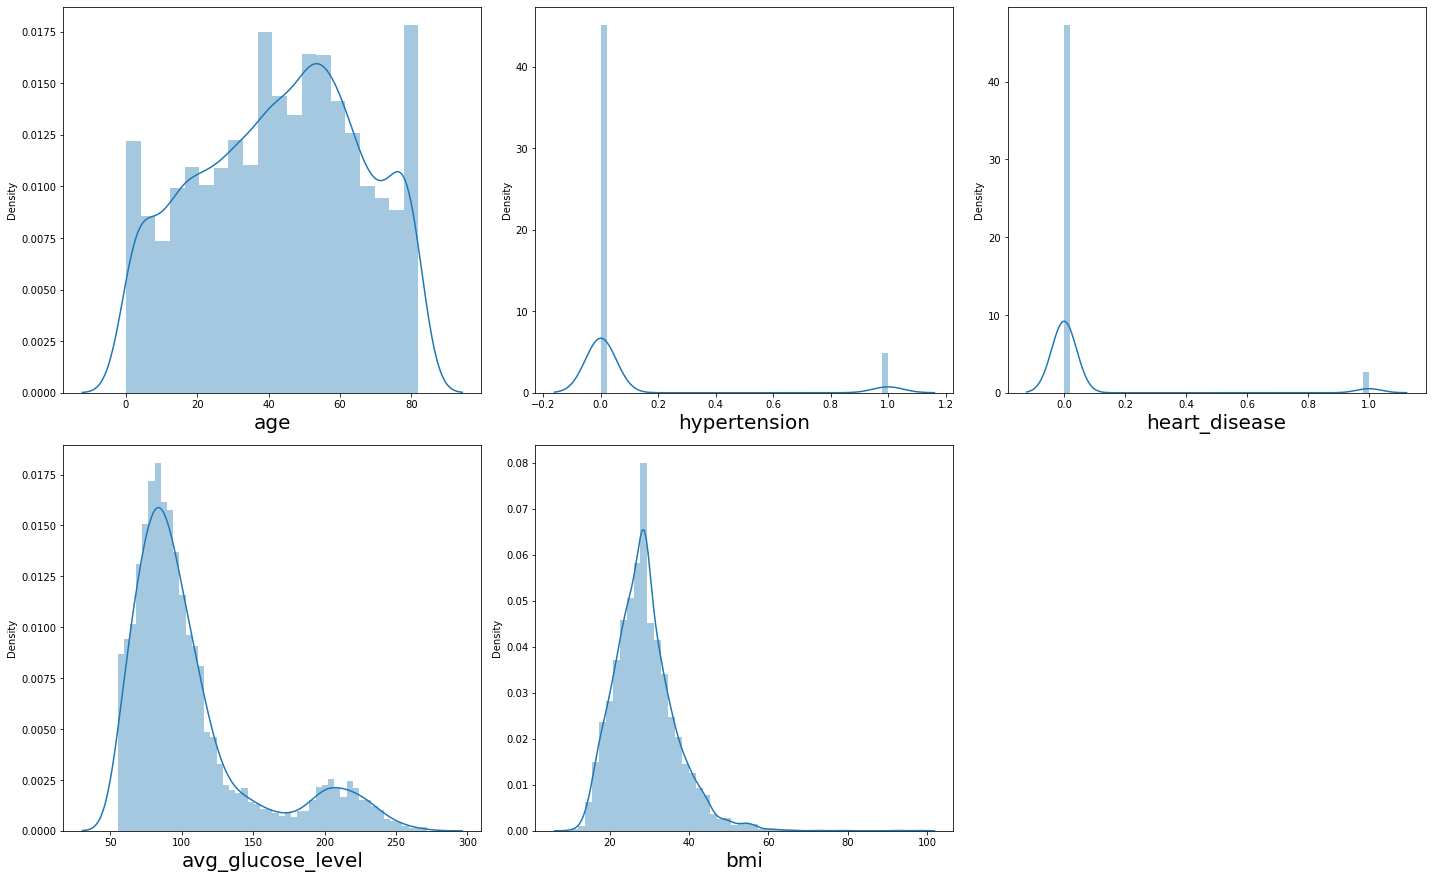

In [31]:
# lets see how data is distributed for every column
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

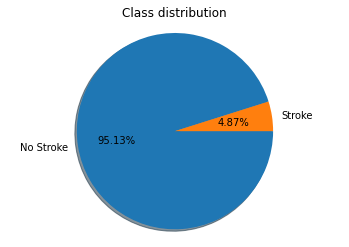

# samples associated with no stroke: 4861
# samples associated with stroke: 249


In [32]:
class_occur = df['stroke'].value_counts()
class_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_occur[0]))
print("# samples associated with stroke: {}".format(class_occur[1]))

## Handle categorical columns

In [33]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,17.0,0,0,No,Private,Urban,92.97,28.893237,formerly smoked,0
1,Female,13.0,0,0,No,children,Rural,85.81,18.600000,Unknown,0
2,Male,55.0,0,0,Yes,Private,Urban,89.17,31.500000,never smoked,0
3,Female,42.0,0,0,No,Private,Urban,98.53,18.500000,never smoked,0
4,Female,31.0,0,0,No,Private,Urban,108.89,52.300000,Unknown,0


In [34]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

## LABEL ENCODING 

In [35]:
gender = pd.get_dummies(df[['gender']], drop_first= True)
gender.head()

,gender_Male,gender_Other
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [36]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [37]:
df.smoking_status.unique()

array(['formerly smoked', 'Unknown', 'never smoked', 'smokes'],
      dtype=object)

In [38]:
married = pd.get_dummies(df[['ever_married']], drop_first= True)
married.head()

,ever_married_Yes
0,0
1,0
2,1
3,0
4,0


In [39]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [40]:
work = pd.get_dummies(df[['work_type']], drop_first= True)
work.head()

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,1,0,0
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [41]:
residence = pd.get_dummies(df[['Residence_type']], drop_first= True)
residence.head()

,Residence_type_Urban
0,1
1,0
2,1
3,1
4,1


In [42]:
smoking = pd.get_dummies(df[['smoking_status']], drop_first= True)
smoking.head()

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,0,0


In [43]:
data = pd.concat([df, gender, married, work, residence, smoking], axis = 1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Female,17.0,0,0,No,Private,Urban,92.97,28.893237,formerly smoked,...,0,0,0,1,0,0,1,1,0,0
1,Female,13.0,0,0,No,children,Rural,85.81,18.600000,Unknown,...,0,0,0,0,0,1,0,0,0,0
2,Male,55.0,0,0,Yes,Private,Urban,89.17,31.500000,never smoked,...,0,1,0,1,0,0,1,0,1,0
3,Female,42.0,0,0,No,Private,Urban,98.53,18.500000,never smoked,...,0,0,0,1,0,0,1,0,1,0
4,Female,31.0,0,0,No,Private,Urban,108.89,52.300000,Unknown,...,0,0,0,1,0,0,1,0,0,0


In [44]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

In [45]:
data = data.drop(columns=categorical_features, axis=1)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,17.0,0,0,92.97,28.893237,0,0,0,0,0,1,0,0,1,1,0,0
1,13.0,0,0,85.81,18.600000,0,0,0,0,0,0,0,1,0,0,0,0
2,55.0,0,0,89.17,31.500000,0,1,0,1,0,1,0,0,1,0,1,0
3,42.0,0,0,98.53,18.500000,0,0,0,0,0,1,0,0,1,0,1,0
4,31.0,0,0,108.89,52.300000,0,0,0,0,0,1,0,0,1,0,0,0


In [46]:
#data = data.drop(columns="id" , axis=1)
#data.head()

In [47]:
data.shape

(5110, 17)

In [48]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

## Split dataset into train and test

In [49]:
data.head(100)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,17.00,0,0,92.97,28.893237,0,0,0,0,0,1,0,0,1,1,0,0
1,13.00,0,0,85.81,18.600000,0,0,0,0,0,0,0,1,0,0,0,0
2,55.00,0,0,89.17,31.500000,0,1,0,1,0,1,0,0,1,0,1,0
3,42.00,0,0,98.53,18.500000,0,0,0,0,0,1,0,0,1,0,1,0
4,31.00,0,0,108.89,52.300000,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,74.00,0,0,204.77,40.800000,0,0,0,0,0,0,1,0,1,0,1,0
96,61.00,1,0,170.05,60.200000,0,0,0,1,0,1,0,0,0,0,0,1
97,45.00,0,0,87.47,21.500000,0,0,0,1,0,1,0,0,0,0,1,0
98,43.00,0,0,101.35,32.200000,0,0,0,0,0,0,0,0,0,0,1,0


In [50]:
x = data.drop("stroke", axis=1)
x.head()                                  #dropping target variable

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,17.0,0,0,92.97,28.893237,0,0,0,0,1,0,0,1,1,0,0
1,13.0,0,0,85.81,18.600000,0,0,0,0,0,0,1,0,0,0,0
2,55.0,0,0,89.17,31.500000,1,0,1,0,1,0,0,1,0,1,0
3,42.0,0,0,98.53,18.500000,0,0,0,0,1,0,0,1,0,1,0
4,31.0,0,0,108.89,52.300000,0,0,0,0,1,0,0,1,0,0,0


In [51]:
y = data[['stroke']]
y.head()                               #only target variable

,stroke
0,0
1,0
2,0
3,0
4,0


## USING CLASSIFICATION IMBALANCE TECHINQUE SMOTE

In [52]:
! pip install imblearn

In [53]:
cc

In [54]:
x,y=smote.fit_resample(x,y)

## Scaling the data 

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [56]:
x

array([[-1.71859962, -0.31310507, -0.23013518, ...,  2.60817335,
        -0.60531727, -0.33196017],
       [-1.89892114, -0.31310507, -0.23013518, ..., -0.3834101 ,
        -0.60531727, -0.33196017],
       [-0.00554518, -0.31310507, -0.23013518, ..., -0.3834101 ,
         1.65202622, -0.33196017],
       ...,
       [ 0.93887493, -0.31310507, -0.23013518, ..., -0.3834101 ,
        -0.60531727, -0.33196017],
       [ 1.07584018, -0.31310507, -0.23013518, ..., -0.3834101 ,
         1.65202622, -0.33196017],
       [ 0.40238768, -0.31310507, -0.23013518, ...,  2.60817335,
        -0.60531727, -0.33196017]])

## SPILITTING THE DATA

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)     

In [58]:
x_train

array([[ 1.12146432, -0.31310507, -0.23013518, ..., -0.3834101 ,
        -0.60531727, -0.33196017],
       [-0.13716367, -0.31310507, -0.23013518, ..., -0.3834101 ,
         1.65202622, -0.33196017],
       [-1.9890819 , -0.31310507, -0.23013518, ..., -0.3834101 ,
        -0.60531727, -0.33196017],
       ...,
       [ 0.5043629 , -0.31310507, -0.23013518, ..., -0.3834101 ,
        -0.60531727, -0.33196017],
       [ 1.07638394, -0.31310507, -0.23013518, ..., -0.3834101 ,
        -0.60531727, -0.33196017],
       [ 0.951558  , -0.31310507, -0.23013518, ..., -0.3834101 ,
        -0.60531727, -0.33196017]])

In [59]:
y_train

,stroke
2321,1
6842,1
3055,0
151,0
3799,0
...,...
5734,1
5191,1
5390,1
860,1


In [60]:
x_test

array([[ 0.40017824,  3.19381603, -0.23013518, ..., -0.3834101 ,
         1.65202622, -0.33196017],
       [-0.32404722, -0.31310507, -0.23013518, ..., -0.3834101 ,
         1.65202622, -0.33196017],
       [-2.39480532, -0.31310507, -0.23013518, ..., -0.3834101 ,
        -0.60531727, -0.33196017],
       ...,
       [-1.80876038, -0.31310507, -0.23013518, ..., -0.3834101 ,
         1.65202622, -0.33196017],
       [-0.81699202, -0.31310507, -0.23013518, ..., -0.3834101 ,
        -0.60531727, -0.33196017],
       [ 1.0981555 , -0.31310507, -0.23013518, ..., -0.3834101 ,
        -0.60531727, -0.33196017]])

In [61]:
y_test

,stroke
1145,0
8501,1
3903,0
1608,0
9139,1
...,...
6951,1
3772,0
4302,0
495,0


In [62]:
print(len(x_train), len(x_test))
#print(y_train)
print("---------------------------")     #print the how many no of training and testing data is there ....
print(len(y_train), len(y_test))

6805 2917
---------------------------
6805 2917


## MODEL TRAINING 

### LOGISTIC REGRESSION

In [63]:
from sklearn.linear_model import LogisticRegression   #importing the logistic regression algorithm
lr = LogisticRegression()    #model
lr.fit(x_train, y_train)    #fitting the data 

LogisticRegression()

In [64]:
LogisticRegressionScore = lr.score(x_test, y_test)
#print("Accuracy Score of Logistic Regression",LogisticRegressionScore)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)


Accuracy obtained by Logistic Regression model: 86.18443606444977


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


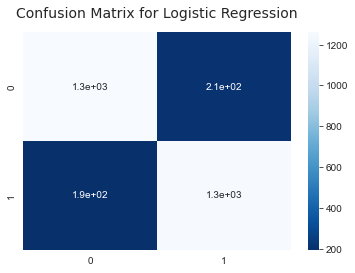

In [65]:
# Having a look at the confusion matrix for Logistic Regression

from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("dark")
y_pred_lr = lr.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, fontname="Helvetica", y=1.04);

In [66]:
# Having  the classification report of Logistic Regression

from sklearn import metrics                                  #metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1469
           1       0.86      0.87      0.86      1448

    accuracy                           0.86      2917
   macro avg       0.86      0.86      0.86      2917
weighted avg       0.86      0.86      0.86      2917



## KNN  

In [1]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(_train, y_train)

NameError: name 'x_train' is not defined

In [68]:
KNeighborsClassifierScore = knn.score(x_test, y_test)
print("Accuracy obtained by K Neighbors Classifier :", KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier : 90.74391498114501


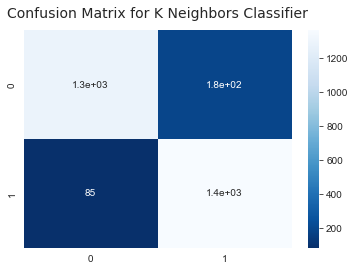

In [69]:
# Confustion Matrix 

y_pred_knn = knn.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [70]:
print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1469
           1       0.88      0.94      0.91      1448

    accuracy                           0.91      2917
   macro avg       0.91      0.91      0.91      2917
weighted avg       0.91      0.91      0.91      2917



## Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [72]:
DecisionTreeClassifierScore = tree.score(x_test,y_test)
print("Accuracy obtained by Decision Tree Classifier :", DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier : 90.98388755570792


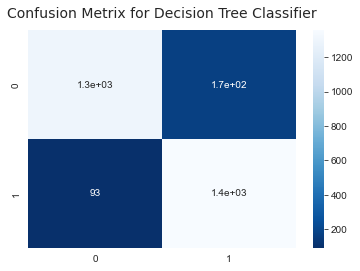

In [73]:
y_pred_tree = tree.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Metrix for Decision Tree Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [74]:
print(metrics.classification_report(y_test, y_pred_tree));

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1469
           1       0.89      0.94      0.91      1448

    accuracy                           0.91      2917
   macro avg       0.91      0.91      0.91      2917
weighted avg       0.91      0.91      0.91      2917



## RANDOM FOREST CLASSIFIER

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=6,n_jobs=1)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=6, n_jobs=1)

In [76]:
RandomForestClassifierScore = rfc.score(x_test,y_test)
print("Accuarcy obtained by Random Forest Classifier :", RandomForestClassifierScore*100)

Accuarcy obtained by Random Forest Classifier : 94.20637641412411


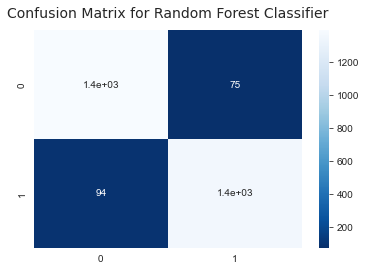

In [77]:
# Confusion Matrix of Random Forest Classifier

y_pred_rfc = rfc.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [78]:
print(metrics.classification_report(y_test, y_pred_rfc));

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1469
           1       0.95      0.94      0.94      1448

    accuracy                           0.94      2917
   macro avg       0.94      0.94      0.94      2917
weighted avg       0.94      0.94      0.94      2917



## SVM

In [79]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [80]:
SVM = sv.score(x_test,y_test)
print("Accuarcy obtained by SVM Classifier :", SVM*100)

Accuarcy obtained by SVM Classifier : 90.16112444292081


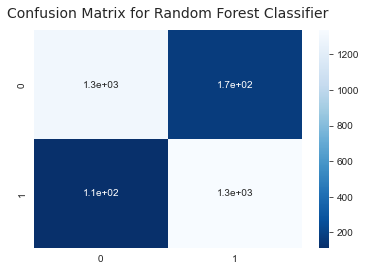

In [81]:
# Confusion Matrix of Random Forest Classifier

y_pred_svm = sv.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [82]:
print(metrics.classification_report(y_test, y_pred_svm));

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1469
           1       0.88      0.92      0.90      1448

    accuracy                           0.90      2917
   macro avg       0.90      0.90      0.90      2917
weighted avg       0.90      0.90      0.90      2917



## ADABOOST

In [83]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(n_estimators=6000, random_state = 0)
Ada.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=6000, random_state=0)

In [84]:
  print('AdaBoost Classifier Training Accuracy:', Ada.score(x_test, y_test)*100)

AdaBoost Classifier Training Accuracy: 92.32087761398698


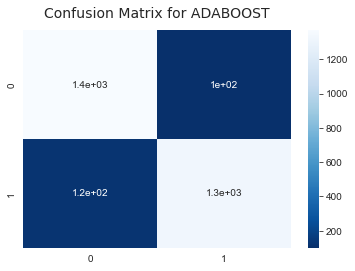

In [85]:
# Confusion Matrix of ADABOOST

y_pred_ada = Ada.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for ADABOOST", fontsize=14, fontname="Helvetica", y=1.03);

In [86]:
print(metrics.classification_report(y_test, y_pred_ada));

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1469
           1       0.93      0.91      0.92      1448

    accuracy                           0.92      2917
   macro avg       0.92      0.92      0.92      2917
weighted avg       0.92      0.92      0.92      2917



## GAUSSIAN NB

In [87]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(x_train, y_train)

GaussianNB()

In [88]:
  print('GaussianNB  Training Accuracy:', gauss.score(x_test, y_test)*100)

GaussianNB  Training Accuracy: 56.66780939321221


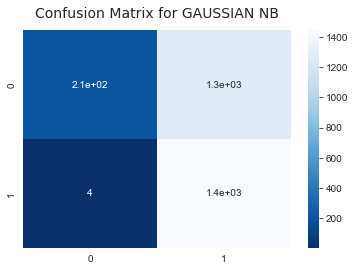

In [89]:
# Confusion Matrix of GAUSSIAN NB
y_pred_gauss = gauss.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_gauss)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for GAUSSIAN NB", fontsize=14, fontname="Helvetica", y=1.03);

In [90]:
print(metrics.classification_report(y_test, y_pred_gauss));

              precision    recall  f1-score   support

           0       0.98      0.14      0.25      1469
           1       0.53      1.00      0.70      1448

    accuracy                           0.57      2917
   macro avg       0.76      0.57      0.47      2917
weighted avg       0.76      0.57      0.47      2917



In [91]:
# WORST PERFORMANCE OF THE NB ALGORITHM

## XGBOOST

In [92]:
! pip install xgboost

In [93]:
from xgboost import XGBClassifier 
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

# Predicting the test set results
y_xgb = xgb_model.predict(x_test)
y_xgb_prob = xgb_model.predict_proba(x_test)

[10:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [94]:
  print('XGB Testing Accuracy:', xgb_model.score(x_test, y_test)*100)

XGB Testing Accuracy: 95.09770311964347


In [95]:
def calc_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # calculate the sensitivity
    sensitivity = TP / (TP + FN)    
    # calculate the specificity
    specificity = TN / (TN + FP)
    return sensitivity,specificity

Classification report for XGB: 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1469
           1       0.94      0.96      0.95      1448

    accuracy                           0.95      2917
   macro avg       0.95      0.95      0.95      2917
weighted avg       0.95      0.95      0.95      2917

Confusion matrix for XGB: 
[[1385   84]
 [  59 1389]]
Accuracy score for XGB: 0.95
Precision score for XGB: 0.94
Recall score for XGB: 0.96
F1 score for XGB: 0.95
Sensitivity score for XGB: 0.96
Specitivity score for XGB: 0.94
AUC score for XGB: 0.99


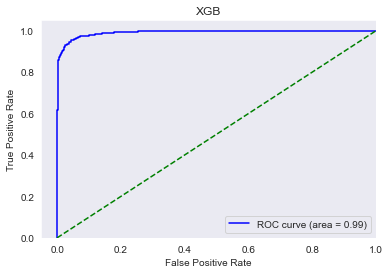

In [96]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
print("Classification report for XGB: \n{}".format(classification_report(y_test,y_xgb)))
print("Confusion matrix for XGB: \n{}".format(confusion_matrix(y_test,y_xgb)))
print("Accuracy score for XGB: {:.2f}".format(accuracy_score(y_test,y_xgb)))
# calculate precision, recall, and f1 scores
prec_xgb = precision_score(y_test,y_xgb)
rec_xgb = recall_score(y_test,y_xgb)
f1_xgb = f1_score(y_test,y_xgb)
print("Precision score for XGB: {:.2f}".format(prec_xgb))
print("Recall score for XGB: {:.2f}".format(rec_xgb))
print("F1 score for XGB: {:.2f}".format(f1_xgb))
# calculate sensitivity, specificity, and auc
sens_xgb,spec_xgb = calc_sens_spec(y_test,y_xgb)
fpr, tpr, _ = roc_curve(y_test,  y_xgb_prob[:,1])
auc_xgb = roc_auc_score(y_test, y_xgb_prob[:,1])
print("Sensitivity score for XGB: {:.2f}".format(sens_xgb))
print("Specitivity score for XGB: {:.2f}".format(spec_xgb))
print("AUC score for XGB: {:.2f}".format(auc_xgb))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_xgb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('XGB')
ax.legend(loc="lower right")
plt.show()

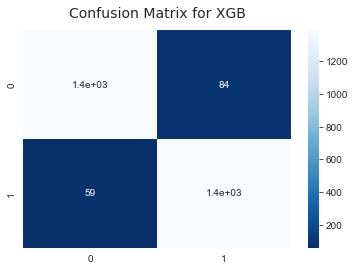

In [97]:
# Confusion Matrix of XGB

y_pred_xgb= xgb_model.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for XGB", fontsize=14, fontname="Helvetica", y=1.03);

In [98]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1469
           1       0.94      0.96      0.95      1448

    accuracy                           0.95      2917
   macro avg       0.95      0.95      0.95      2917
weighted avg       0.95      0.95      0.95      2917



## COMPARSION OF ALGORITHMS

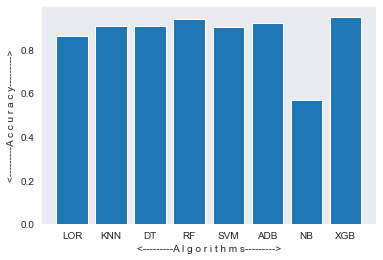

In [99]:
plt.bar(['LOR','KNN','DT','RF','SVM','ADB',"NB","XGB"],[LogisticRegressionScore,KNeighborsClassifierScore,DecisionTreeClassifierScore,RandomForestClassifierScore,SVM, Ada.score(x_test, y_test),gauss.score(x_test, y_test),xgb_model.score(x_test, y_test)])
plt.xlabel("<---------A l g o r i t h m s--------->")
plt.ylabel("<---------A c c u r a c y--------->")
plt.show()

In [100]:
model_list=['LOR','KNN','DT','RF','SVM','ADB',"NB","XGB"]
accuracy_list=[LogisticRegressionScore,KNeighborsClassifierScore,DecisionTreeClassifierScore,RandomForestClassifierScore,SVM, Ada.score(x_test, y_test),gauss.score(x_test, y_test),xgb_model.score(x_test, y_test)]


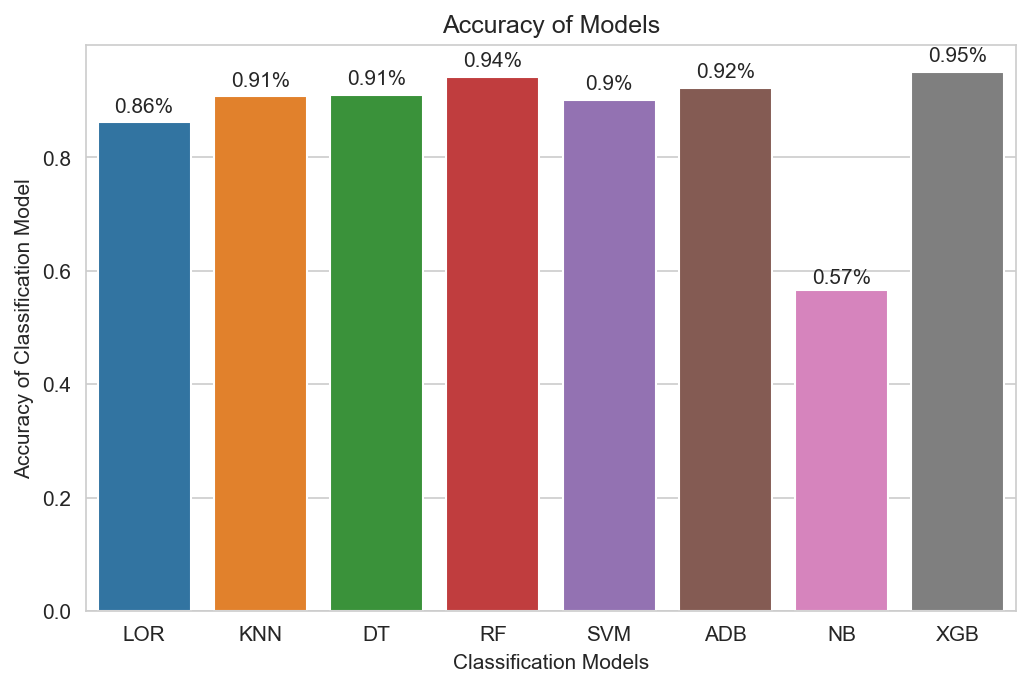

In [101]:
sns.set_style("whitegrid")
sns.color_palette("Paired")
plt.figure(figsize=(8,5), dpi=150)
ax = sns.barplot(x=model_list, y=accuracy_list)
plt.title("Accuracy of Models")
plt.xlabel('Classification Models')
plt.ylabel("Accuracy of Classification Model")
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')
plt.show()

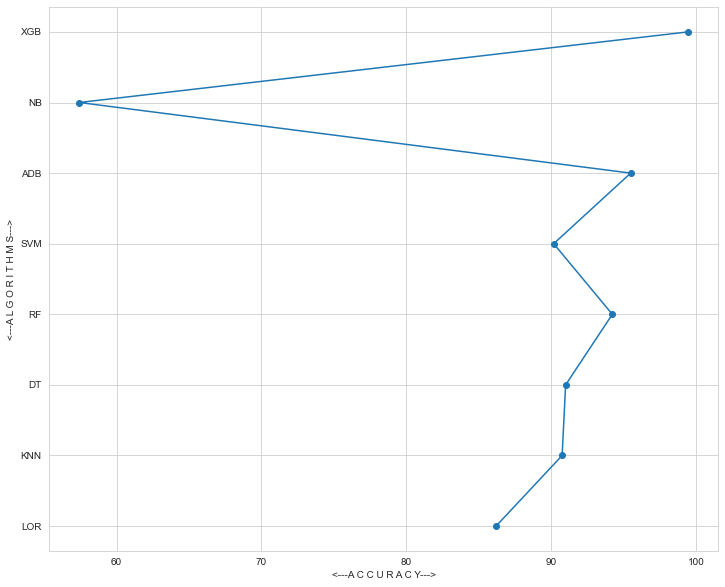

In [102]:
x = np.array(['LOR','KNN','DT','RF','SVM','ADB',"NB","XGB"])  # X-axis points
y = np.array([LogisticRegressionScore*100,KNeighborsClassifierScore*100,DecisionTreeClassifierScore*100,RandomForestClassifierScore*100,SVM*100, Ada.score(x_train, y_train)*100,gauss.score(x_train, y_train)*100,xgb_model.score(x_train, y_train)*100])  # Y-axis points
plt.figure(figsize=(12,10))
plt.ylabel("<---A L G O R I T H M S--->")
plt.xlabel("<---A C C U R A C Y--->")
plt.plot(y,x,marker="o")  # Plot the chart
plt.show()  # display